In [12]:
import sys
import json
sys.path.append('..')
from src.analysis.model_performances import *
from src.common import *

from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

answer_type = TRUE_FALSE_ANSWER_TYPE #FREE_ANSWER#
score_key = F1_SCORE_KEY#'accuracy'
answer_type_ext = tf_answer_type(score_key = F1_SCORE_KEY)
stats_all = collect_stats_all(tf_answer_type(score_key = F1_SCORE_KEY))

100%|██████████| 25920/25920 [00:01<00:00, 14168.05it/s]


In [78]:
save_dir = os.path.join(STATISTICS_PATH, 'by_categories_plots')
os.makedirs(save_dir, exist_ok=True)
plan_length = 1
model_name = 'gemini'#'gemma-2b-it'
prompt_type = 'few_shot_5'

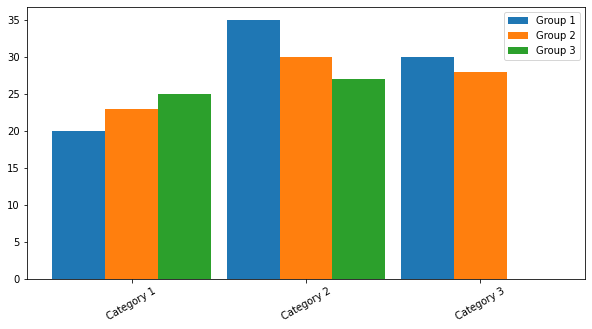

In [80]:
import matplotlib.pyplot as plt
import numpy as np

NAME_KEY = 'name'
DATA_KEY = 'data'

def plt_n_bars(categories, groups):
    plt.figure(figsize=(10, 5))
    bar_width = 0.3
    
    mult_factor = bar_width*len(groups)*1.1

    ind = np.arange(len(categories)) * mult_factor # the x locations for the groups
    num_groups = len(groups)
    total_width = num_groups * bar_width
    offset = total_width / 2 - bar_width / 2  # to center the group of bars

    for i, group in enumerate(groups):
        data = [0 if x is None else x for x in group[DATA_KEY]]
        
        plt.bar(ind + i * bar_width, data, width=bar_width, label=group[NAME_KEY])

    # Set the x-axis labels in the middle of the groups of bars
    plt.xticks(ind + offset, categories, rotation=30)
    plt.legend()
# 
# Example usage
categories = ['Category 1', 'Category 2', 'Category 3']
group1 = {NAME_KEY: 'Group 1', DATA_KEY: [20, 35, 30]}
group2 = {NAME_KEY: 'Group 2', DATA_KEY: [23, 30, 28]}
group3 = {NAME_KEY: 'Group 3', DATA_KEY: [25, 27, None]}

plt_n_bars(categories, [group1, group2, group3])
plt.show()


# By Domain

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

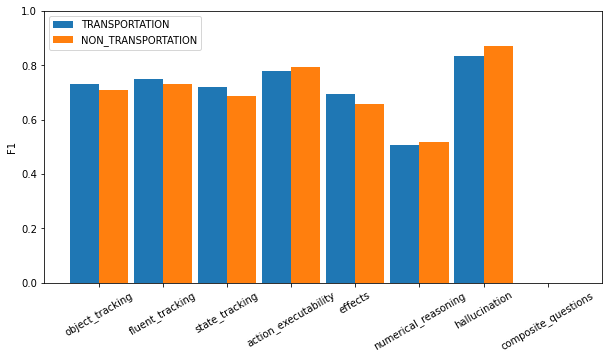

In [81]:
categories = QUESTION_CATEGORIES
subs = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS


data_all = []
for domain in [TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]:
    plt.figure()
    data = {NAME_KEY: domain, DATA_KEY: []}
    for question_category in categories:
            res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
            data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0,1])

save_path = os.path.join(save_dir, f'by_domain.{model_name}.{prompt_type}.{subs}.{ramifications}.pl-{plan_length}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')


In [76]:
categories

['object_tracking',
 'fluent_tracking',
 'state_tracking',
 'action_executability',
 'effects',
 'numerical_reasoning',
 'hallucination',
 'composite_questions']

In [37]:
data_all

[{'name': 'TRANSPORTATION',
  'data': [0.7306501547987616,
   0.7508111615833875,
   0.7209302325581395,
   0.7785714285714285,
   0.6936170212765957,
   0.5057142857142857,
   0.835,
   None]},
 {'name': 'NON_TRANSPORTATION',
  'data': [0.7088122605363985,
   0.7324660633484162,
   0.6875,
   0.7957446808510639,
   0.6566666666666666,
   0.5191666666666667,
   0.873076923076923,
   None]}]